# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [8]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [9]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing_dataset = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing_dataset.data.features 
y = bike_sharing_dataset.data.targets 

# metadata 
print(bike_sharing_dataset.metadata) 
  
# variable information 
print(bike_sharing_dataset.variables) 

{'uci_id': 275, 'name': 'Bike Sharing Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Wed Dec 20 2023', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': None, 'additional_info': {'summary': 'Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

**1.**
1) Уравнение вида $y=\theta_1 x$ = $y=\theta_1 x + \theta_0$, где $\theta_0=0$
2) Пытаемся минимализмровать $F(\theta_1;\theta_0)=||Y-\theta_1 X + \theta_0||^2 = \sum_{i=1}^{n}(y_i - \theta_1 x_i + \theta_0)^2$
Для этого ищем производные по всем параметрам и приравниваем их к нулю
\begin{equation*}
 \begin{cases}
   \frac{\partial{F(\theta_1;\theta_0)}}{\partial{\theta_1}}=0 \\
   \frac{\partial{F(\theta_1;\theta_0)}}{\partial{\theta_0}}=0
 \end{cases}
  \begin{cases}
   -2\sum_{i=1}^{n}(y_i - \theta_1 x_i + \theta_0)x_i=0 \\
   -2\sum_{i=1}^{n}(y_i - \theta_1 x_i + \theta_0)=0
 \end{cases}
   \begin{cases}
   \theta_1 \sum_{i=1}^{n}{x_i}^2 + \theta_0\sum_{i=1}^{n}x_i=\sum_{i=1}^{n}{x_{i}y_i} \\
   \theta_1 \sum_{i=1}^{n}{x_i} + \theta_0\sum_{i=1}^{n}1=\sum_{i=1}^{n}{y_i}
 \end{cases}
 \begin{cases}
   \theta_1 = \frac{n\sum_{i=1}^{n}{x_{i}y_i} - \sum_{i=1}^{n}x_i*\sum_{i=1}^{n}y_i}{n\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2} \\
   \theta_0 = \frac{\sum_{i=1}^{n}y_i-\theta_1\sum_{i=1}^{n}x_i}{n}
 \end{cases}
\end{equation*}

**2.**
1) Градиентный спуск $\theta_{{t+1}}=\theta_{t} - \eta\sum_{i=1}^{n}x_i({x_i}^T-y_i)$
2) Стохастический градиентный спуск$\theta_{{t+1}}=\theta_{t} - \eta\frac{n}{k}\sum_{i\in{I}}^{n}x_i({x_i}^T-y_i)$, где $I=\{i\}_k, i_j \neq i_q, k\leq n$, i выбираются случайно.

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

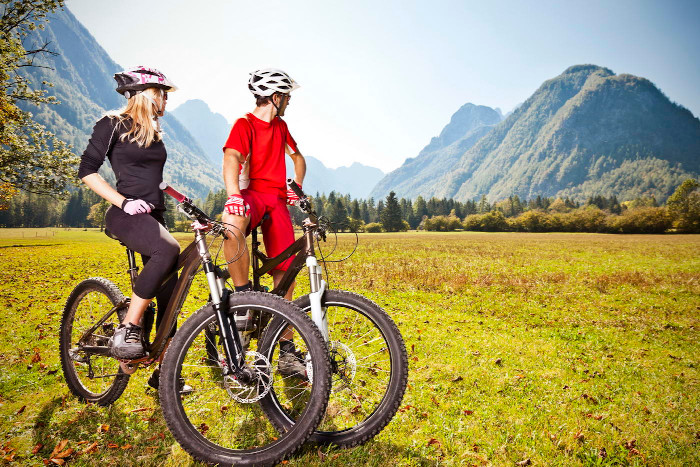

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [12]:
X_train, X_test = X.iloc[:int(X.shape[0]/5 * 4)], X.iloc[int(X.shape[0]/5 * 4):]
y_train, y_test = y.iloc[:int(y.shape[0]/5 * 4)], y.iloc[int(y.shape[0]/5 * 4):]

In [13]:
data_train = X_train
data_test = X_test
data_train['cnt'] = y_train['cnt']
data_test['cnt'] = y_test['cnt']

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [27]:
categorial_features = ["season", "yr", "mnth", "hr", "weekday", "weathersit", "holiday", "workingday"]  # категориальные признаки
real_features = ["temp", "atemp", "hum", "windspeed"]  # вещественные признаки
target_feature = 'cnt'  # целевой признак

Обычные поточечные графики по каждой фиче

Более подходящие графики для каждой фичи.
Производилось суммирование 'cnt'-target_feature при одинаковых значениях просматриваемой feature

In [7]:
data_train.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1

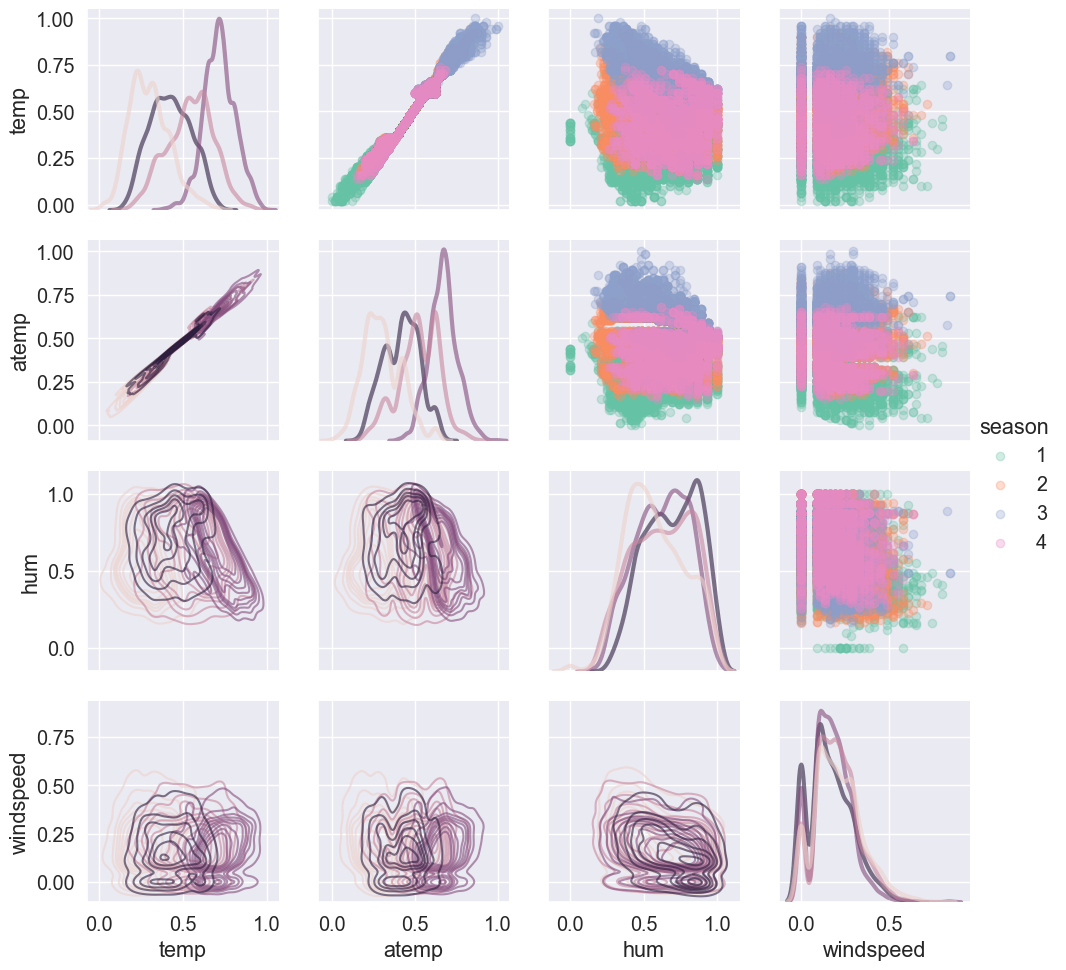

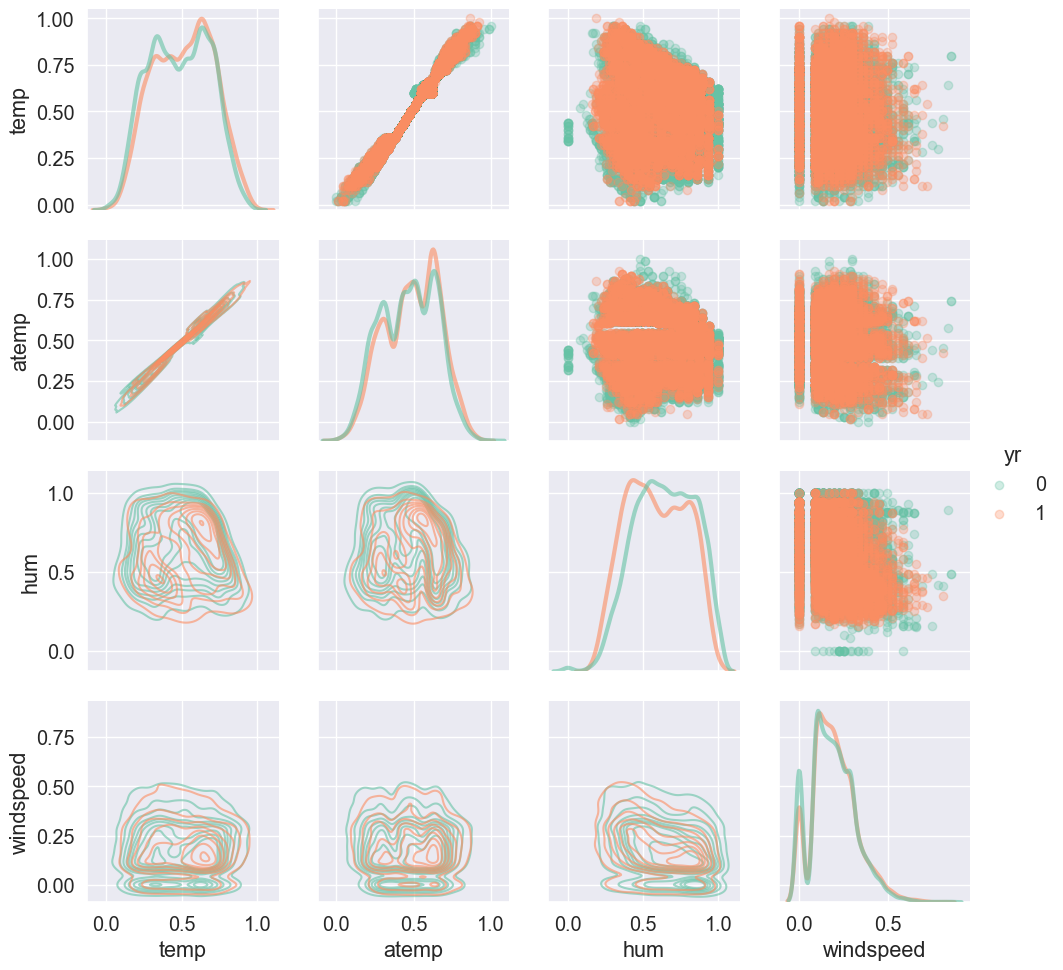

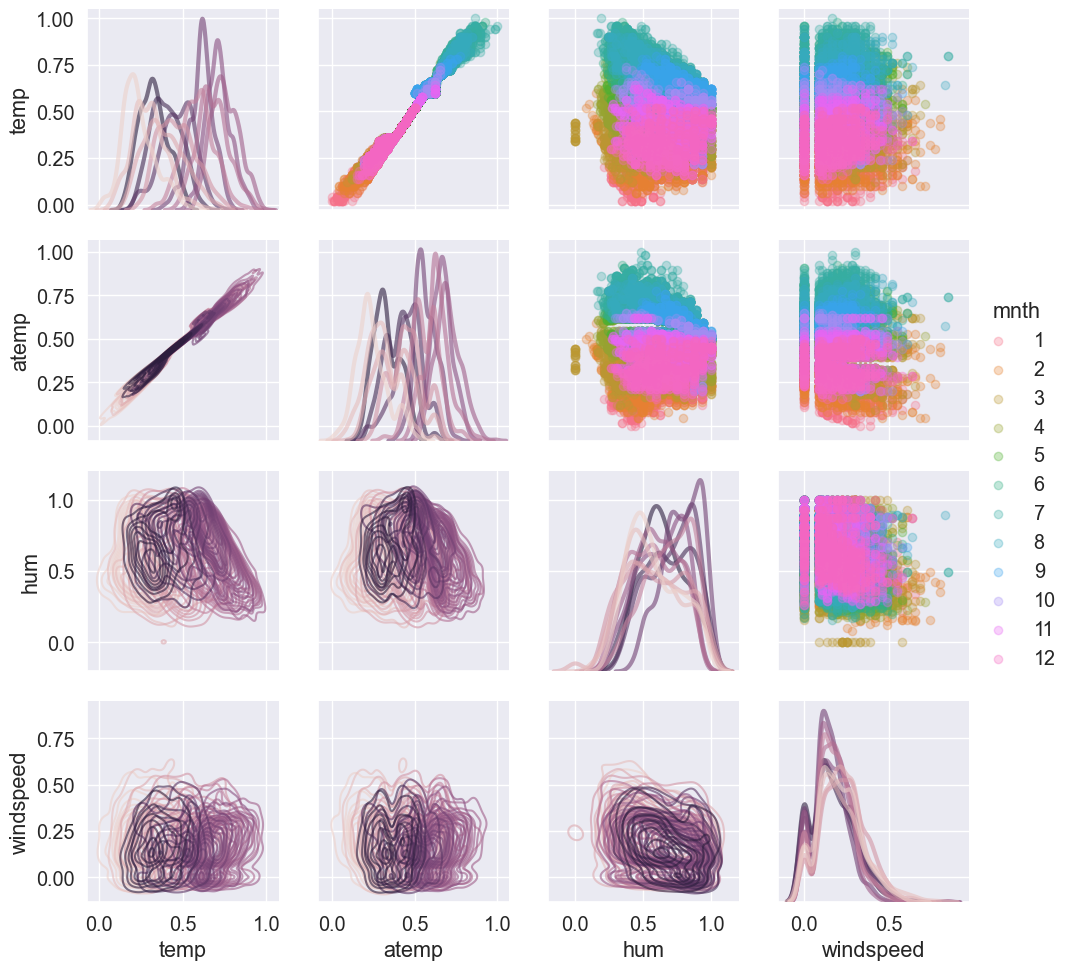

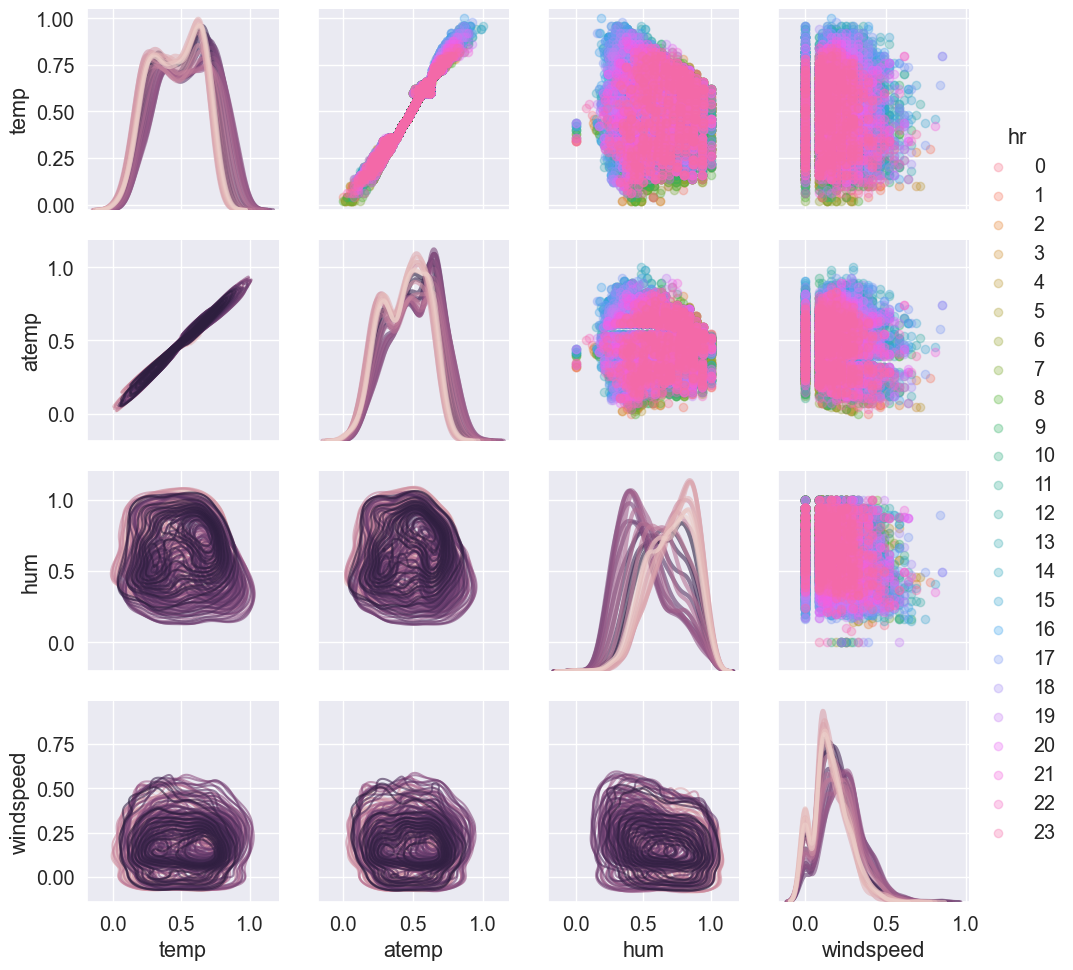

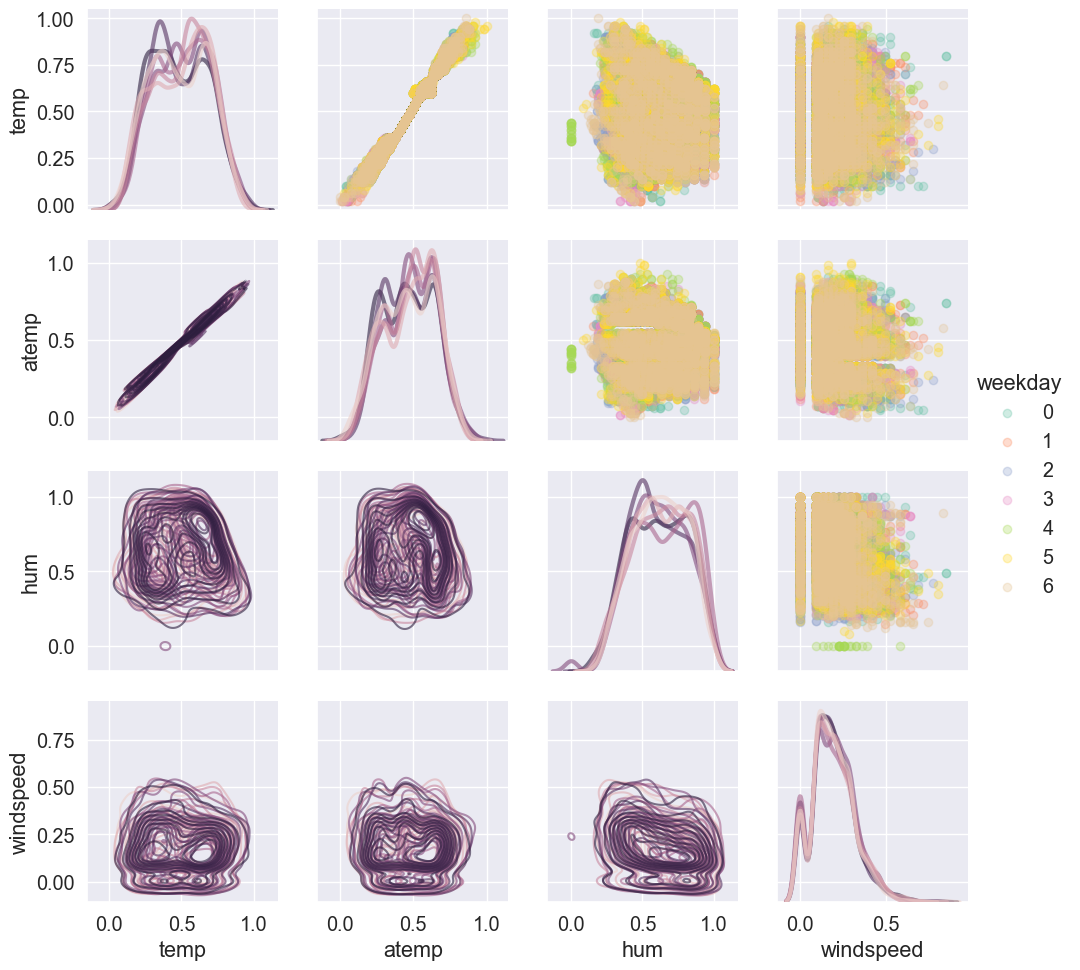

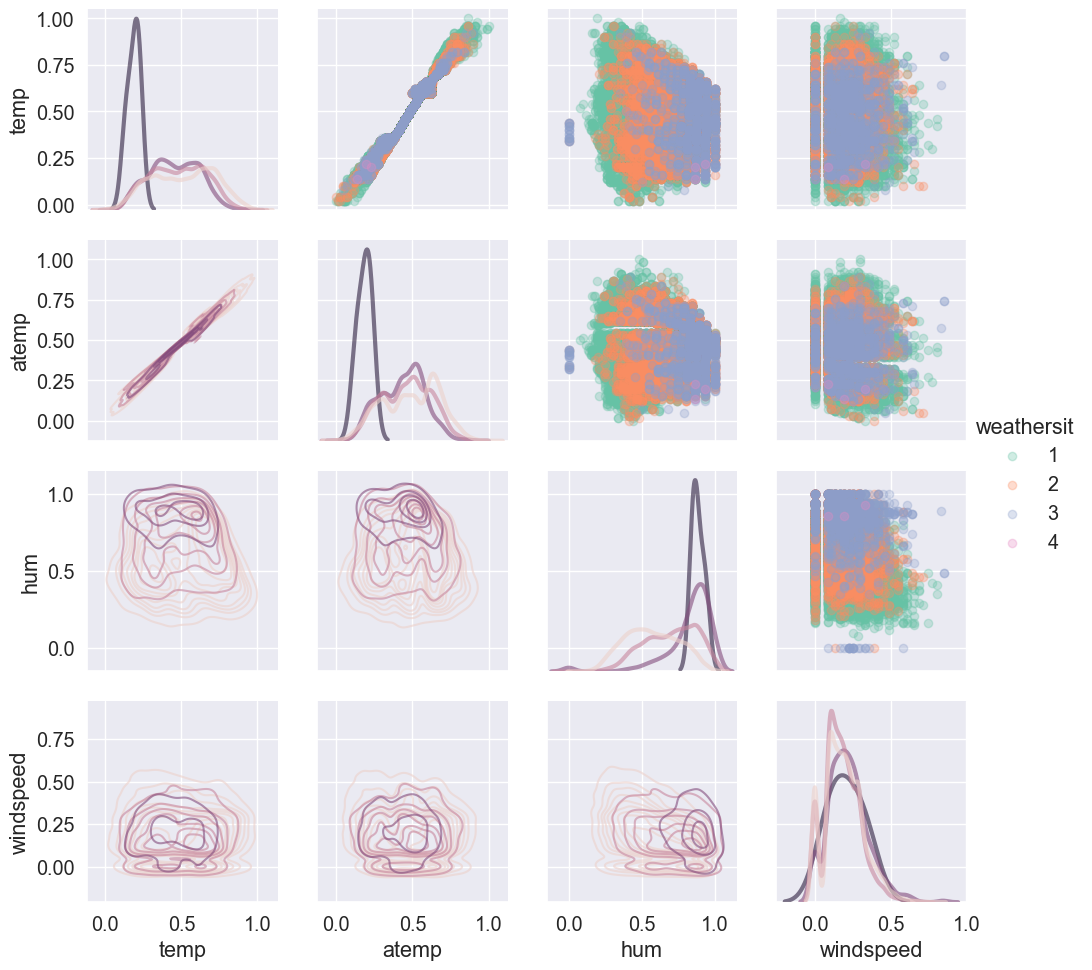

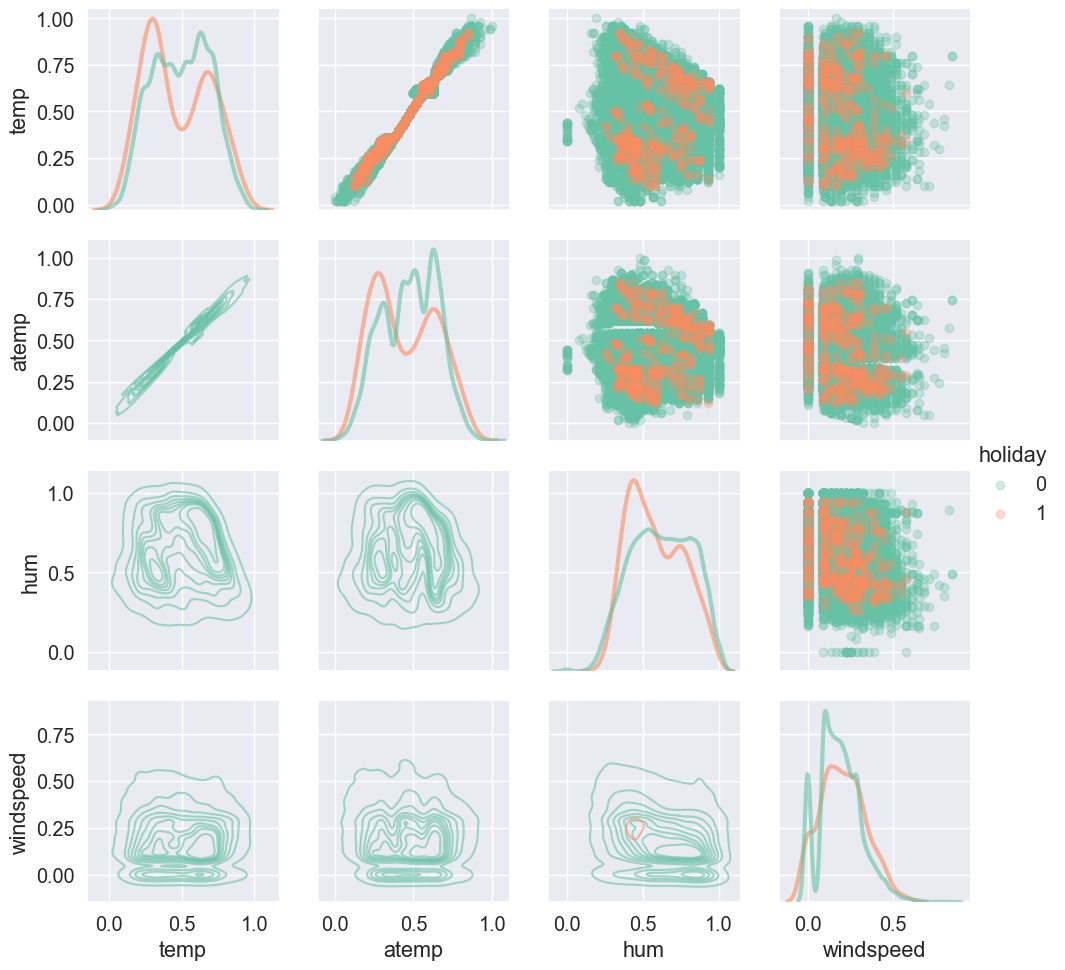

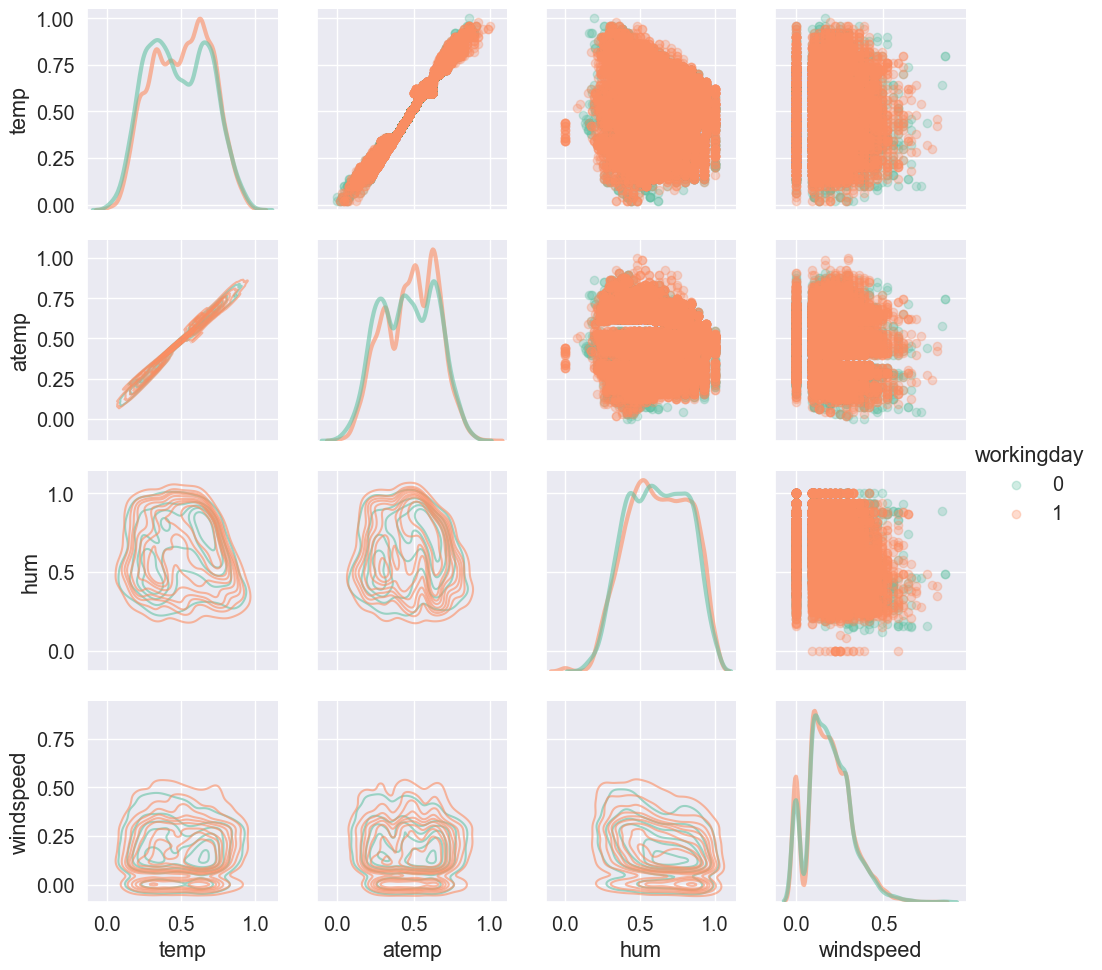

In [14]:
for hue in categorial_features:
    g = sns.PairGrid(data_train[['temp', 'atemp', 'hum', 'windspeed', hue]], hue=hue, diag_sharey=False)
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

По графикам можно сделать следующие выводы:
1) В seson=4 благоприятная temp(atemp)
2) weathersit показывает плохую hum, temm(atemp)
3) Во многих диаграмах данные деляться на две части, при зависимости от hum и windspeed. Причем одна часть намного меньше основной
4) При зависимости hum от windspeed появляются два отдельных сегмента данных, что следует из 3)
5) Зависимость atemp от temp линейна
6) Для windspeed стоит рассмотреть функцию exp() или какое-нибудь распределение 
7) Лучший диапозон данных по графикам(с нормировкой) - windspeed: [0.1; 0.6] * hum: [0.1; 1]

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Исключить взаимозависиммые данные и данные, от которых ничего не зависит: atamp и yr
    
**б).** Выбрать нужный диапозон данных

Реализуйте данную процедуру.

In [18]:
data_train = data_train.loc[data_train['yr'] == 0]
data_train = data_train.drop(columns='yr')
data_train

dteday  season  mnth  hr  holiday  weekday  workingday  weathersit  \
0     2011-01-01       1     1   0        0        6           0           1   
1     2011-01-01       1     1   1        0        6           0           1   
2     2011-01-01       1     1   2        0        6           0           1   
3     2011-01-01       1     1   3        0        6           0           1   
4     2011-01-01       1     1   4        0        6           0           1   
...          ...     ...   ...  ..      ...      ...         ...         ...   
8640  2011-12-31       1    12  19        0        6           0           1   
8641  2011-12-31       1    12  20        0        6           0           1   
8642  2011-12-31       1    12  21        0        6           0           1   
8643  2011-12-31       1    12  22        0        6           0           1   
8644  2011-12-31       1    12  23        0        6           0           1   

      temp   atemp   hum  windspeed  cnt  
0     0.24  0.2879  0.81     0.0000   16  
1     0.22  0.2727  0.80     0.0000   40  
2     0.22  0.2727  0.80     0.0000   32  
3     0.24  0.2879  0.75     0.0000   13  
4     0.24  0.2879  0.75     0.0000    1  
...    ...     ...   ...        ...  ...  
8640  0.42  0.4242  0.54     0.2239   92  
8641  0.42  0.4242  0.54     0.2239   71  
8642  0.40  0.4091  0.58     0.1940   52  
8643  0.38  0.3939  0.62     0.1343   38  
8644  0.36  0.3788  0.66     0.0000   31  

[8645 rows x 13 columns]

In [20]:
data_train = data_train.drop(columns='atemp')
data_train.head()

dteday  season  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1     1   0        0        6           0           1   
1  2011-01-01       1     1   1        0        6           0           1   
2  2011-01-01       1     1   2        0        6           0           1   
3  2011-01-01       1     1   3        0        6           0           1   
4  2011-01-01       1     1   4        0        6           0           1   

   temp   hum  windspeed  cnt  
0  0.24  0.81        0.0   16  
1  0.22  0.80        0.0   40  
2  0.22  0.80        0.0   32  
3  0.24  0.75        0.0   13  
4  0.24  0.75        0.0    1

In [22]:
data_train = data_train.loc[(data_train['windspeed'] > 0.1) & (data_train['windspeed'] < 0.6)
                            & (data_train['hum'] > 0.1) & (data_train['hum'] < 1)]
data_train.head()

dteday  season  mnth  hr  holiday  weekday  workingday  weathersit  \
10  2011-01-01       1     1  10        0        6           0           1   
11  2011-01-01       1     1  11        0        6           0           1   
12  2011-01-01       1     1  12        0        6           0           1   
13  2011-01-01       1     1  13        0        6           0           2   
14  2011-01-01       1     1  14        0        6           0           2   

    temp   hum  windspeed  cnt  
10  0.38  0.76     0.2537   36  
11  0.36  0.81     0.2836   56  
12  0.42  0.77     0.2836   84  
13  0.46  0.72     0.2985   94  
14  0.46  0.72     0.2836  106

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

**Удалил не нужное**

In [28]:
categorial_features = ["season", "mnth", "hr", "weekday", "weathersit", "holiday", "workingday"]  # категориальные признаки
real_features = ["temp", "hum", "windspeed"]  # вещественные признаки
target_feature = 'cnt'  # целевой признак

**Закодировал категориальные признаки, по предыдущему распределению**

In [29]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_bike = encoder.fit_transform(data_train[categorial_features])  # обучаем и кодируем
train_bike

C:\Users\Micor\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Получил следующее:**

In [30]:
encoder.categories_

[array([1, 2, 3, 4], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64)]

**Соединил категориальные признаки с вещественными**

In [32]:
X_train = np.hstack([data_train[real_features], train_bike])
X_train.shape

(6618, 51)

In [ ]:
Создание модели линейной регрессии

In [34]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, data_train[target_feature])  # обучаем

LinearRegression()

In [ ]:
Полученные коэффициенты

In [35]:
model.coef_

array([ 1.65715161e+02, -8.19393257e+01, -3.54419235e+01,  1.26695878e+01,
        2.83683347e+01,  4.89234805e+01,  6.20621276e+00,  1.61231040e+01,
        3.77016899e+01,  7.65713494e+01,  5.48280980e+01,  2.13546366e+01,
        3.16922655e+01,  5.07115310e+01,  3.61076338e+01,  2.09691935e+01,
        2.00080552e+01, -1.38871790e+01, -2.06898629e+01, -2.82067545e+01,
       -3.28352225e+01, -1.88112765e+01,  2.31330075e+01,  1.21264047e+02,
        2.24310772e+02,  1.17812181e+02,  7.66760438e+01,  9.41007009e+01,
        1.22555972e+02,  1.20250363e+02,  1.10592063e+02,  1.15734211e+02,
        1.63955237e+02,  2.88767436e+02,  2.62965431e+02,  1.78074682e+02,
        1.21208473e+02,  8.39761673e+01,  5.69496380e+01,  2.41750888e+01,
       -8.99279756e+13, -8.99279756e+13, -8.99279756e+13, -8.99279756e+13,
       -8.99279756e+13,  6.71181695e-01, -5.17781113e+00, -4.03040626e+01,
       -5.79051477e+01,  8.99279756e+13,  8.99279756e+13])

In [36]:
model.intercept_

-16.93856716530675

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [37]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_bike = encoder.transform(data_test[categorial_features])

# Соединяем данные
X_test = np.hstack([data_test[real_features], test_bike])

In [39]:
test_preds = model.predict(X_test)

In [63]:
print('квадратичная: {:.2f}'.format(metrics.mean_squared_error(data_test[target_feature], test_preds)))
print('абсолютная: {:.2f}'.format(metrics.mean_absolute_error(data_test[target_feature], test_preds)))
print('процентная: {:.2f}%'.format(metrics.mean_absolute_percentage_error(data_test[target_feature], test_preds)))

квадратичная: 28235.90
абсолютная: 114.62
процентная: 1.25%


**Если всё правильно посчиталось, то мы получили достаточно маленькую ошибку.**

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

**Повторение всех предыдущих пунктов без удаления 'atemp' и 'yr'**

In [64]:
X_train, X_test = X.iloc[:int(X.shape[0]/5 * 4)], X.iloc[int(X.shape[0]/5 * 4):]
y_train, y_test = y.iloc[:int(y.shape[0]/5 * 4)], y.iloc[int(y.shape[0]/5 * 4):]

data_train = X_train
data_test = X_test
data_train['cnt'] = y_train['cnt']
data_test['cnt'] = y_test['cnt']

categorial_features = ["season", "yr", "mnth", "hr", "weekday", "weathersit", "holiday", "workingday"]  # категориальные признаки
real_features = ["temp", "atemp", "hum", "windspeed"]  # вещественные признаки
target_feature = 'cnt'  # целевой признак

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_bike = encoder.fit_transform(data_train[categorial_features])  # обучаем и кодируем
train_bike

X_train = np.hstack([data_train[real_features], train_bike])
X_train.shape

model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, data_train[target_feature])  # обучаем

# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_bike = encoder.transform(data_test[categorial_features])

# Соединяем данные
X_test = np.hstack([data_test[real_features], test_bike])

test_preds = model.predict(X_test)

print('квадратичная: {:.2f}'.format(metrics.mean_squared_error(data_test[target_feature], test_preds)))
print('абсолютная: {:.2f}'.format(metrics.mean_absolute_error(data_test[target_feature], test_preds)))
print('процентная: {:.2f}%'.format(metrics.mean_absolute_percentage_error(data_test[target_feature], test_preds)))

квадратичная: 17911.77
абсолютная: 98.80
процентная: 2.15%


C:\Users\Micor\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Я сразу удалил зависимый пармаметр. Поэтому сейчас сделал с ним**

Сделайте выводы.

**Выводы: Квадратичная и абсолютная погрешности снизились, так как температурная зависимость повысилась(дважды учитывалась при обработке), но процентная стала выше, что показывает реальную тенденцию ухудшения регресии**

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**1.**
1) Пытаемся минимализмровать $F(\theta)=$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 = (Y-X\theta)^T(Y-X\theta) + \lambda(\theta^T\theta)=Y^TY-2(Y^TX)\theta+\theta^TX^TX\theta + \lambda(\theta^T\theta)= (Y-X\theta)^T(Y-X\theta) + \lambda(\theta^T\theta)=Y^TY-2(Y^TX)\theta+\theta^TX^T\theta + \lambda(\theta^TE\theta)$
2) $\nabla F(\theta)=-2X^TY+2X^TX\theta+2\lambda\theta=0$ 
3) $\widehat\theta=(X^T X+\lambda E)^{-1}X^TY$ 

4) Да решает, так как мы прибавляем diag($\lambda > 0$) матрицу к положительноопределённой => на диагонале как миниму $\lambda$

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**2.**

1) Градиентный спуск $\theta_{t+1}=\theta_t-\eta X^T(X-Y)-\eta\lambda$
2) Стохастический градиентный спуск $\theta_{{t+1}}=\theta_{t} - \eta\frac{n}{k}X_I({X_I}^T-Y_I)-\eta\frac{n}{k}\lambda$, где I - номера строк$,
I выбираются случайно.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Если не стандартизировать данные, то может получиться так, что $\lambda$ влияет на данные не одинаково

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

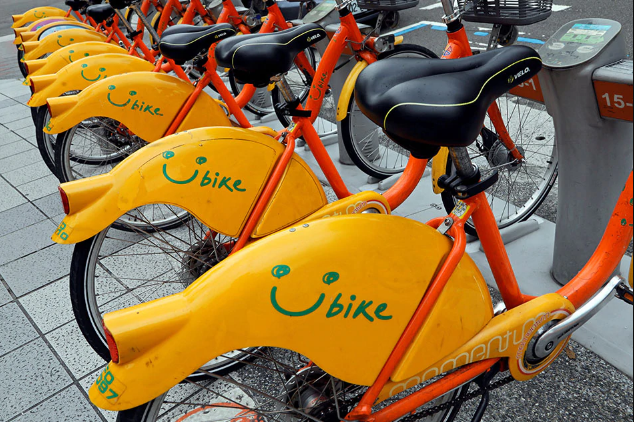

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [241]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
             
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        
        standardization_model='StandardScaler'
        if standardization_model=='StandardScaler':
            scaler = StandardScaler()
        elif standardization_model=='MinMaxScaler':
            scaler = MinMaxScaler()
        scaler.fit(X)
        
        X = scaler.transform(X)
        self.coef_ = np.linalg.inv(X.T.dot(X) + self.lambd*np.eye(X.shape[1])).dot(X.T).dot(Y)
    
        if self.fit_intercept:
            self.intercept_ = np.mean(Y - np.dot(X, self.coef_.T))
            print(self.intercept_)
        else:
            self.intercept_ = 0
        
        return self

        
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        
        predictions = self.coef_.dot(X.T) + self.intercept_
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [242]:
data = X.copy()
data['cnt'] = y['cnt']

data_train, data_test = train_test_split(data, test_size=0.2, random_state=1)

data_train, data_validate = train_test_split(data_train, test_size=0.25, random_state=1)
    
print(data_train.shape, data_test.shape, data_validate.shape)

(10427, 14) (3476, 14) (3476, 14)


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [243]:
categorial_features = ["season", "mnth", "hr", "weekday", "weathersit", "holiday", "workingday"]  # категориальные признаки
real_features = ["temp", "hum", "windspeed"]  # вещественные признаки
target_feature = 'cnt'  # целевой признак

data_train = data_train.loc[data_train['yr'] == 0]
data_train = data_train.drop(columns='yr')

data_train = data_train.drop(columns='atemp')

data_train = data_train.loc[(data_train['windspeed'] > 0.1) & (data_train['windspeed'] < 0.6)
                            & (data_train['hum'] > 0.1) & (data_train['hum'] < 1)]

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_bike = encoder.fit_transform(data_train[categorial_features])  # обучаем и кодируем

X_train = np.hstack([data_train[real_features], train_bike])
X_train

C:\Users\Micor\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.62  , 0.69  , 0.1045, ..., 0.    , 0.    , 0.    ],
       [0.34  , 0.46  , 0.2985, ..., 0.    , 1.    , 0.    ],
       [0.32  , 0.7   , 0.1642, ..., 0.    , 0.    , 1.    ],
       ...,
       [0.64  , 0.89  , 0.5522, ..., 0.    , 0.    , 0.    ],
       [0.18  , 0.93  , 0.1045, ..., 0.    , 0.    , 1.    ],
       [0.56  , 0.88  , 0.1045, ..., 0.    , 0.    , 1.    ]])

In [244]:
encoder.categories_

[array([1, 2, 3, 4], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64)]

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

**Решил рассмотреть $\lambda$ в трёх порядках [0.01:100], при 0.1 получются лучшие предсказания**

In [245]:
lambd = [0, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10, 30, 50, 70, 100]

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

**Для validate**

In [248]:
mean_sqared_validate = []
mean_absolute_validate = []
mean_absolute_percentage_validate = []

coefs_validate = {}
print('Валидационная выборка')
for i in lambd:
    model = RidgeRegression(i, fit_intercept=False)
    model.fit(X_train, data_train[target_feature])
    
    coefs_validate[i] = model.coef_
    validate_bike = encoder.transform(data_validate[categorial_features])
    
    X_validate = np.hstack([data_validate[real_features], validate_bike])
    validate_preds = model.predict(X_validate)
    
    mean_sqared_validate.append(metrics.mean_squared_error(data_validate[target_feature], validate_preds))
    mean_absolute_validate.append(metrics.mean_absolute_error(data_validate[target_feature], validate_preds))
    mean_absolute_percentage_validate.append(metrics.mean_absolute_percentage_error(data_validate[target_feature], validate_preds))
    
    print('lambd={}'.format(i))
    print('квадратичная: {:.2f}'.format(metrics.mean_squared_error(data_validate[target_feature], validate_preds)))
    print('абсолютная: {:.2f}'.format(metrics.mean_absolute_error(data_validate[target_feature], validate_preds)))
    print('процентная: {:.2f}%'.format(metrics.mean_absolute_percentage_error(data_validate[target_feature], validate_preds)))
    print('\n')

Валидационная выборка
lambd=0
квадратичная: 46454.52
абсолютная: 149.23
процентная: 1.02%


lambd=0.01
квадратичная: 46716.57
абсолютная: 149.84
процентная: 1.01%


lambd=0.03
квадратичная: 46717.41
абсолютная: 149.84
процентная: 1.01%


lambd=0.1
квадратичная: 46720.36
абсолютная: 149.85
процентная: 1.01%


lambd=0.3
квадратичная: 46728.75
абсолютная: 149.87
процентная: 1.02%


lambd=0.5
квадратичная: 46737.13
абсолютная: 149.89
процентная: 1.02%


lambd=0.7
квадратичная: 46745.50
абсолютная: 149.91
процентная: 1.02%


lambd=1
квадратичная: 46758.02
абсолютная: 149.93
процентная: 1.02%


lambd=3
квадратичная: 46840.62
абсолютная: 150.13
процентная: 1.02%


lambd=5
квадратичная: 46921.73
абсолютная: 150.32
процентная: 1.02%


lambd=7
квадратичная: 47001.39
абсолютная: 150.51
процентная: 1.02%


lambd=10
квадратичная: 47118.25
абсолютная: 150.79
процентная: 1.02%


lambd=30
квадратичная: 47824.17
абсолютная: 152.47
процентная: 1.02%


lambd=50
квадратичная: 48423.94
абсолютная: 153.91
п

**Для train**

In [249]:
mean_sqared_train = []
mean_absolute_train = []
mean_absolute_percentage_train = []
coefs_train = {}
print('Обучающая выборка')
for i in lambd:
    model = RidgeRegression(i, fit_intercept=False)
    model.fit(X_train, data_train[target_feature])
    coefs_train[i] = model.coef_
    
    train_preds = model.predict(X_train)
    
    mean_sqared_train.append(metrics.mean_squared_error(data_validate[target_feature], validate_preds))
    mean_absolute_train.append(metrics.mean_absolute_error(data_validate[target_feature], validate_preds))
    mean_absolute_percentage_train.append(metrics.mean_absolute_percentage_error(data_validate[target_feature], validate_preds))
    
    print('lambd={}'.format(i))
    print('квадратичная: {:.2f}'.format(metrics.mean_squared_error(data_train[target_feature], train_preds)))
    print('абсолютная: {:.2f}'.format(metrics.mean_absolute_error(data_train[target_feature], train_preds)))
    print('процентная: {:.2f}%'.format(metrics.mean_absolute_percentage_error(data_train[target_feature], train_preds)))
    print('\n')

Обучающая выборка
lambd=0
квадратичная: 25421.93
абсолютная: 112.78
процентная: 1.07%


lambd=0.01
квадратичная: 25626.99
абсолютная: 113.44
процентная: 1.07%


lambd=0.03
квадратичная: 25627.63
абсолютная: 113.44
процентная: 1.07%


lambd=0.1
квадратичная: 25629.86
абсолютная: 113.45
процентная: 1.07%


lambd=0.3
квадратичная: 25636.22
абсолютная: 113.47
процентная: 1.07%


lambd=0.5
квадратичная: 25642.56
абсолютная: 113.49
процентная: 1.07%


lambd=0.7
квадратичная: 25648.90
абсолютная: 113.51
процентная: 1.07%


lambd=1
квадратичная: 25658.38
абсолютная: 113.54
процентная: 1.07%


lambd=3
квадратичная: 25720.97
абсолютная: 113.73
процентная: 1.07%


lambd=5
квадратичная: 25782.47
абсолютная: 113.92
процентная: 1.07%


lambd=7
квадратичная: 25842.90
абсолютная: 114.11
процентная: 1.07%


lambd=10
квадратичная: 25931.61
абсолютная: 114.39
процентная: 1.08%


lambd=30
квадратичная: 26469.04
абсолютная: 116.05
процентная: 1.09%


lambd=50
квадратичная: 26927.65
абсолютная: 117.48
проце

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

In [186]:
import pylab

Данные валидации


Text(0.5, 1.0, 'Процентная')

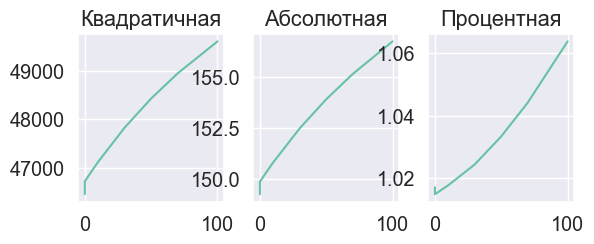

In [187]:
print('Данные валидации')
pylab.subplot (2, 3, 1)
pylab.plot(lambd, mean_sqared_validate)
pylab.title ("Квадратичная")

pylab.subplot (2, 3, 2)
pylab.plot(lambd, mean_absolute_validate)
pylab.title("Абсолютная")

pylab.subplot (2, 3, 3)
pylab.plot(lambd, mean_absolute_percentage_validate)
pylab.title("Процентная")

Данные тренировочные


Text(0.5, 1.0, 'Процентная')

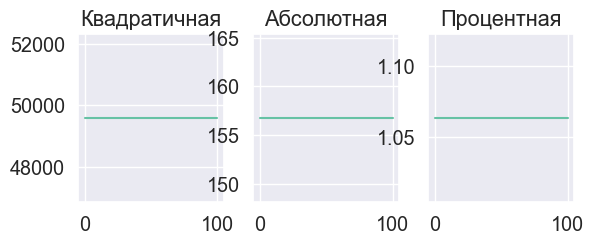

In [188]:
print('Данные тренировочные')
pylab.subplot (2, 3, 1)
pylab.plot(lambd, mean_sqared_train)
pylab.title ("Квадратичная")

pylab.subplot (2, 3, 2)
pylab.plot(lambd, mean_absolute_train)
pylab.title("Абсолютная")

pylab.subplot (2, 3, 3)
pylab.plot(lambd, mean_absolute_percentage_train)
pylab.title("Процентная")

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [210]:
dataCoefs_validate=pd.DataFrame(coefs_validate)
dataCoefs_validate.loc[len(dataCoefs_validate.index)] = lambd
dataCoefs_validate = dataCoefs_validate.T
dataCoefs_validate.head()

0          1         2         3          4          5   \
0.00  34.403328 -14.732275 -4.061713  7.936582  11.845052  18.889687   
0.01  34.407032 -14.731624 -4.062266  7.937503  11.845357  18.890606   
0.03  34.408038 -14.731900 -4.062143  7.938233  11.845877  18.890800   
0.10  34.411552 -14.732867 -4.061715  7.940786  11.847694  18.891477   
0.30  34.421557 -14.735627 -4.060491  7.948044  11.852841  18.893383   

            6         7         8          9   ...        42        43  \
0.00  1.125661  3.334858  7.973407  17.842244  ... -4.538708 -7.017131   
0.01  1.124225  3.333474  7.970115  17.838875  ...  0.921951 -1.490455   
0.03  1.123678  3.332706  7.968782  17.837430  ...  0.921957 -1.490508   
0.10  1.121767  3.330020  7.964124  17.832380  ...  0.921978 -1.490694   
0.30  1.116318  3.322370  7.950864  17.818002  ...  0.922039 -1.491223   

            44        45        46         47        48        49        50  \
0.00 -4.567604 -0.631222 -2.834882 -12.885830 -1.101641 -1.382671  7.300873   
0.01  0.977345 -0.631184 -2.835030 -12.885846 -1.101638 -3.824256  0.417923   
0.03  0.977397 -0.631150 -2.834915 -12.885655 -1.101627 -3.824299  0.417919   
0.10  0.977579 -0.631028 -2.834510 -12.884986 -1.101589 -3.824450  0.417907   
0.30  0.978096 -0.630683 -2.833352 -12.883078 -1.101481 -3.824879  0.417874   

        51  
0.00  0.00  
0.01  0.01  
0.03  0.03  
0.10  0.10  
0.30  0.30  

[5 rows x 52 columns]

**В обычном масштабе**

<Axes: >

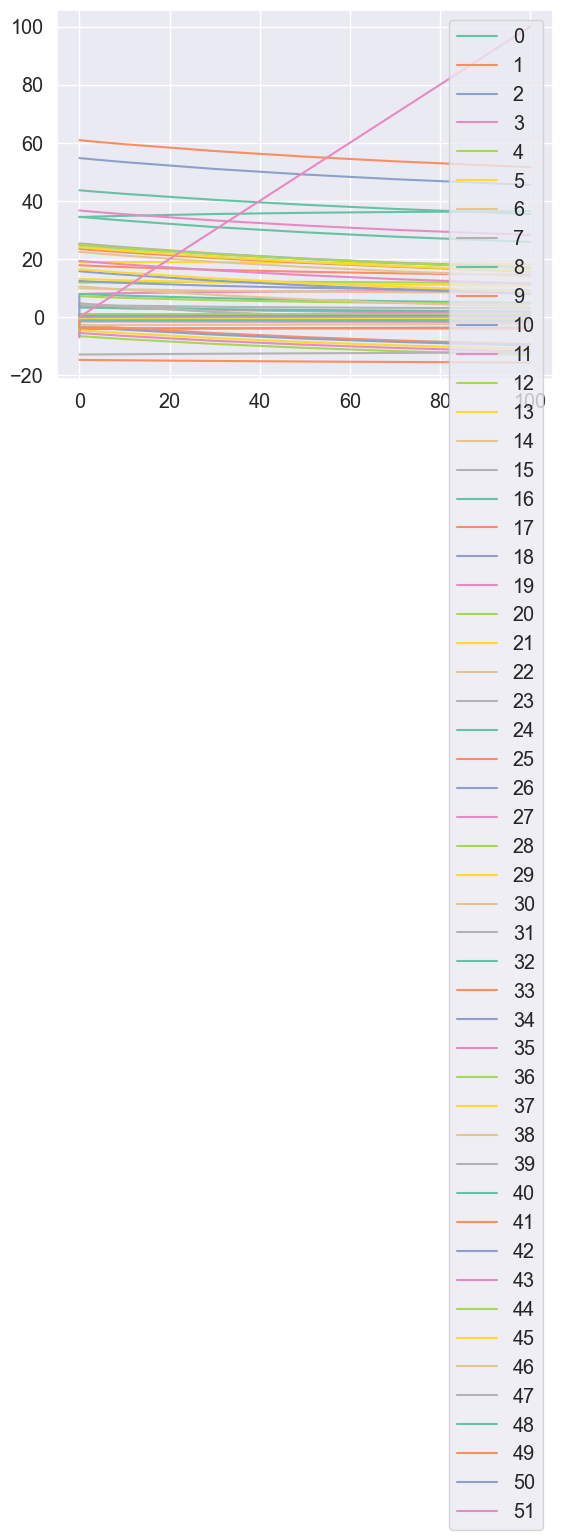

In [227]:
dataCoefs_validate.plot()

**В логарифмическом масштабе**

C:\Users\Micor\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\Micor\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


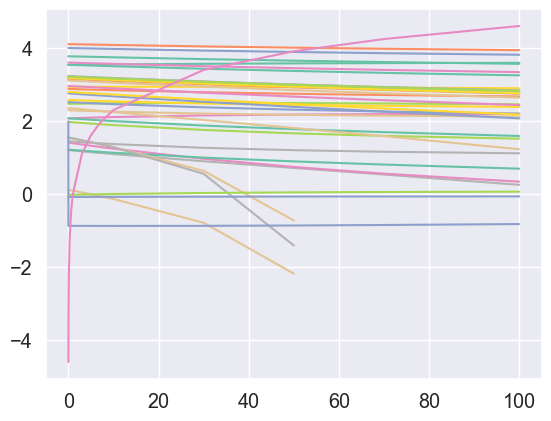

In [228]:
plt.plot(np.log(dataCoefs_validate))

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [223]:
model = RidgeRegression(0.1)
model.fit(X_train, data_train[target_feature])

test_bike = encoder.transform(data_test[categorial_features])
    
X_test = np.hstack([data_test[real_features], test_bike])
test_preds = model.predict(X_test)
    
print('квадратичная: {:.2f}'.format(metrics.mean_squared_error(data_test[target_feature], test_preds)))
print('абсолютная: {:.2f}'.format(metrics.mean_absolute_error(data_test[target_feature], test_preds)))
print('процентная: {:.2f}%'.format(metrics.mean_absolute_percentage_error(data_test[target_feature], test_preds)))

квадратичная: 49556.74
абсолютная: 153.67
процентная: 1.07%


Сделайте выводы.

**С помощью гиперпараметра, мы смогли немного изменять коэффициенты => появился некоторый диапозон в котором мы можем выьирать лучшее значения коэффициентов=> эффективность модели повысилась более чем на 1%. По графикам видно, как изменяются коэффициенты. В обычном и логарифмическом масштабе видно, что все кроме (3) подчиняются примерно одному закону. (3)**

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

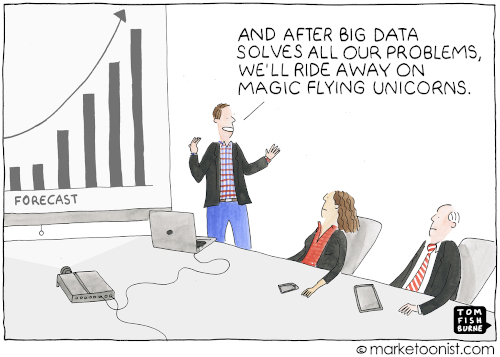

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.